In [57]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
import os
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [58]:
file_str = ['ground_truth_{}','particle_uncertainty_truth_{}']
params = ["0.000000.csv","0.050000.csv","0.100000.csv","0.150000.csv","0.200000.csv","0.250000.csv","0.300000.csv","0.350000.csv","0.400000.csv","0.450000.csv","0.500000.csv",
"0.550000.csv","0.600000.csv","0.650000.csv","0.700000.csv","0.750000.csv","0.800000.csv","0.850000.csv","0.900000.csv","0.950000.csv"]


original_dfs = []

for st in file_str:
    for val in params:
        if('particle_uncertainty_truth' in st and val in "0.500000.csv"):
            continue
        fh = st.format(val)
        df = pd.read_csv(fh,header=None)
        
        df =df.rename(columns={0:'time_str',1:'time_taken_lec',2:'time_taken_safety_controller',3:'area'})
        df['parameter_uncertainty']  = float(val.replace(".csv",""))
        df['mode'] = st[:-3]
        df = df.tail(30)
        original_dfs.append(df)
        
dfs = pd.concat(original_dfs)
dfs['parameter_uncertainty'] = dfs['parameter_uncertainty'] * 100
dfs['time_taken_lec'] = dfs['time_taken_lec'] * 100
dfs['time_taken_safety_controller'] = dfs['time_taken_safety_controller'] * 100
dfs
        
        


,time_str,time_taken_lec,time_taken_safety_controller,area,parameter_uncertainty,mode
26,10/03/2022/07:08:56,59.0164,40.9836,2.93031,0.0,ground_truth
27,10/03/2022/07:10:31,79.9483,20.0517,2.87441,0.0,ground_truth
28,10/03/2022/07:12:04,NaN,NaN,0.00000,0.0,ground_truth
29,10/03/2022/07:13:38,82.4051,17.5949,2.97520,0.0,ground_truth
30,10/03/2022/07:14:51,74.9518,25.0482,2.84605,0.0,ground_truth
...,...,...,...,...,...,...
25,22/03/2022/13:36:09,0.0000,100.0000,3365.21000,95.0,particle_uncertainty_truth
26,22/03/2022/13:39:41,0.0000,100.0000,3868.79000,95.0,particle_uncertainty_truth
27,22/03/2022/13:43:14,0.0000,100.0000,5667.81000,95.0,particle_uncertainty_truth
28,22/03/2022/13:46:47,0.0000,100.0000,3628.05000,95.0,particle_uncertainty_truth


In [59]:
dfs.groupby(['mode','parameter_uncertainty']).median()

time_taken_lec  \
mode                       parameter_uncertainty                   
ground_truth               0.0                         79.948300   
                           5.0                         78.268600   
                           10.0                        80.120000   
                           15.0                        76.262000   
                           20.0                        63.387550   
                           25.0                        56.420250   
                           30.0                        45.330300   
                           35.0                        38.525400   
                           40.0                        36.693250   
                           45.0                        37.688950   
                           50.0                        27.857600   
                           55.0                        26.046350   
                           60.0                        23.391050   
                           65.0                        24.583750   
                           70.0                        22.206500   
                           75.0                        21.972050   
                           80.0                        20.196200   
                           85.0                        28.921300   
                           90.0                        30.878300   
                           95.0                        31.998450   
particle_uncertainty_truth 0.0                         77.289150   
                           5.0                         72.919050   
                           10.0                        73.014000   
                           15.0                        65.156500   
                           20.0                        57.623100   
                           25.0                        52.236400   
                           30.0                        41.573000   
                           35.0                        32.544900   
                           40.0                        17.596550   
                           45.0                         1.609145   
                           55.0                         0.238680   
                           60.0                         0.000000   
                           65.0                         0.000000   
                           70.0                         0.000000   
                           75.0                         0.000000   
                           80.0                         0.000000   
                           85.0                         0.000000   
                           90.0                         0.000000   
                           95.0                         0.000000   

                                                  time_taken_safety_controller  \
mode                       parameter_uncertainty                                 
ground_truth               0.0                                        20.05170   
                           5.0                                        21.73140   
                           10.0                                       19.88000   
                           15.0                                       23.73800   
                           20.0                                       36.61245   
                           25.0                                       43.57975   
                           30.0                                       54.66970   
                           35.0                                       61.47460   
                           40.0                                       63.30675   
                           45.0                                       62.31105   
                           50.0                                       72.14240   
                           55.0                                       73.95365   
                           60.0                                       76.60895   
                           65.0

In [60]:
median_res = dfs.groupby(['mode','parameter_uncertainty']).median().reset_index()
median_gt = median_res[median_res['mode'] == 'ground_truth']
median_gt['percent_change_in_size_of_reachset'] = round((median_gt['area'] - median_gt.iloc[0]['area'])/median_gt.iloc[0]['area'] * 100,2)
median_pu = median_res[median_res['mode'] == 'particle_uncertainty_truth']
median_pu['percent_change_in_size_of_reachset'] = round((median_pu['area'] - median_pu.iloc[0]['area'])/median_pu.iloc[0]['area'] * 100,2)

In [85]:
table = median_res[median_res['parameter_uncertainty']<=55]
table = table.drop(columns = ["time_taken_safety_controller"])
print(round(table,2).to_latex())


\begin{tabular}{llrrr}
\toprule
{} &                        mode &  parameter\_uncertainty &  time\_taken\_lec &     area \\
\midrule
0  &                ground\_truth &                    0.0 &           79.95 &     2.90 \\
1  &                ground\_truth &                    5.0 &           78.27 &     4.88 \\
2  &                ground\_truth &                   10.0 &           80.12 &     7.45 \\
3  &                ground\_truth &                   15.0 &           76.26 &    10.56 \\
4  &                ground\_truth &                   20.0 &           63.39 &    14.55 \\
5  &                ground\_truth &                   25.0 &           56.42 &    19.02 \\
6  &                ground\_truth &                   30.0 &           45.33 &    24.05 \\
7  &                ground\_truth &                   35.0 &           38.53 &    30.82 \\
8  &                ground\_truth &                   40.0 &           36.69 &    39.39 \\
9  &                ground\_truth &            

In [83]:
print(round(median_gt.drop(columns = ["time_taken_safety_controller"]).head(11)).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &          mode &  parameter\_uncertainty &  time\_taken\_lec &  area &  percent\_change\_in\_size\_of\_reachset \\
\midrule
0  &  ground\_truth &                    0.0 &            80.0 &   3.0 &                                 0.0 \\
1  &  ground\_truth &                    5.0 &            78.0 &   5.0 &                                68.0 \\
2  &  ground\_truth &                   10.0 &            80.0 &   7.0 &                               157.0 \\
3  &  ground\_truth &                   15.0 &            76.0 &  11.0 &                               264.0 \\
4  &  ground\_truth &                   20.0 &            63.0 &  15.0 &                               401.0 \\
5  &  ground\_truth &                   25.0 &            56.0 &  19.0 &                               555.0 \\
6  &  ground\_truth &                   30.0 &            45.0 &  24.0 &                               729.0 \\
7  &  ground\_truth &                   35.0 &         

In [84]:
print(round(median_pu.drop(columns = ["time_taken_safety_controller"]).head(11)).to_latex())

\begin{tabular}{llrrrr}
\toprule
{} &                        mode &  parameter\_uncertainty &  time\_taken\_lec &    area &  percent\_change\_in\_size\_of\_reachset \\
\midrule
20 &  particle\_uncertainty\_truth &                    0.0 &            77.0 &    10.0 &                                 0.0 \\
21 &  particle\_uncertainty\_truth &                    5.0 &            73.0 &    12.0 &                                23.0 \\
22 &  particle\_uncertainty\_truth &                   10.0 &            73.0 &    16.0 &                                60.0 \\
23 &  particle\_uncertainty\_truth &                   15.0 &            65.0 &    20.0 &                               100.0 \\
24 &  particle\_uncertainty\_truth &                   20.0 &            58.0 &    24.0 &                               132.0 \\
25 &  particle\_uncertainty\_truth &                   25.0 &            52.0 &    28.0 &                               179.0 \\
26 &  particle\_uncertainty\_truth &             

###  Ground Truth

No handles with labels found to put in legend.


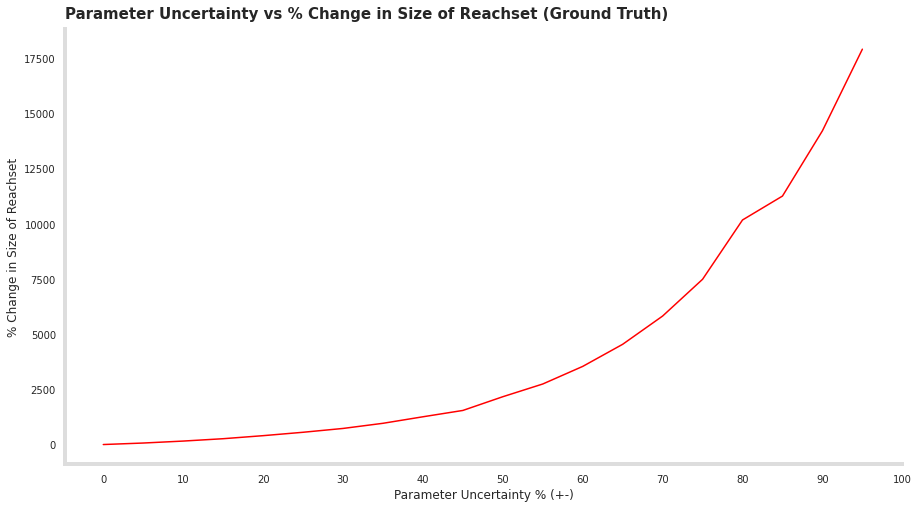

In [86]:
var1 = 'percent_change_in_size_of_reachset'


plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_gt, x="parameter_uncertainty",y=var1,color='red')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 12


_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs % Change in Size of Reachset (Ground Truth)",loc='left',pad=11.0,fontweight="bold",fontsize=15)

plt.setp(ax.spines.values(), linewidth=4)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title
_ = plt.xticks(np.arange(0, 110.0, 10))


### When you Incorporate Position Uncertainty

No handles with labels found to put in legend.


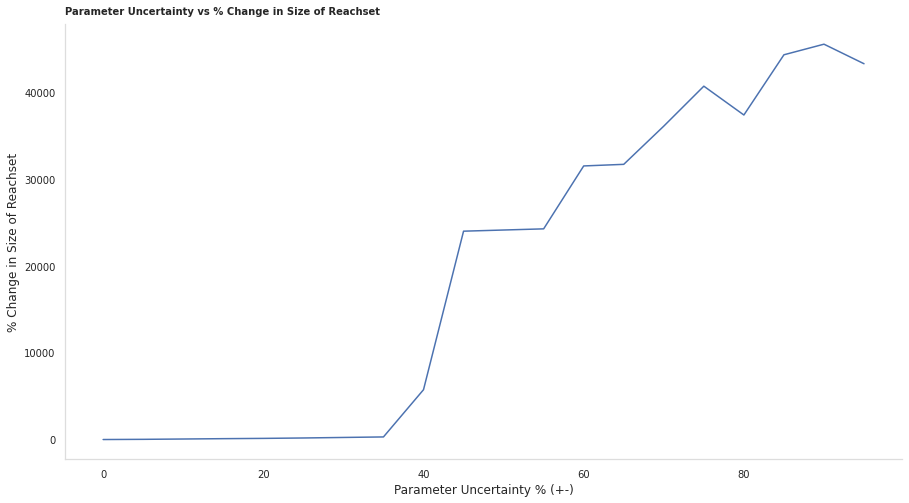

In [65]:
var1 = 'percent_change_in_size_of_reachset'

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y=var1)
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs % Change in Size of Reachset",loc='left',pad=10.0,fontweight="bold")

### Both 

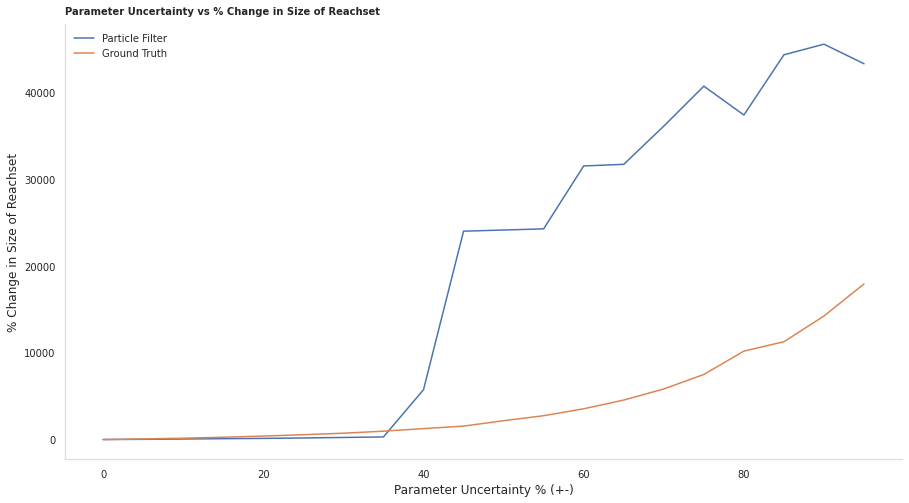

In [87]:
var1 = 'percent_change_in_size_of_reachset'


plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y=var1,label="Particle Filter")
ax = sns.lineplot(data=median_gt, x="parameter_uncertainty",y=var1,label="Ground Truth")
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='upper left',frameon=False)

_= plt.ylabel("% Change in Size of Reachset")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs % Change in Size of Reachset",loc='left',pad=10.0,fontweight="bold")

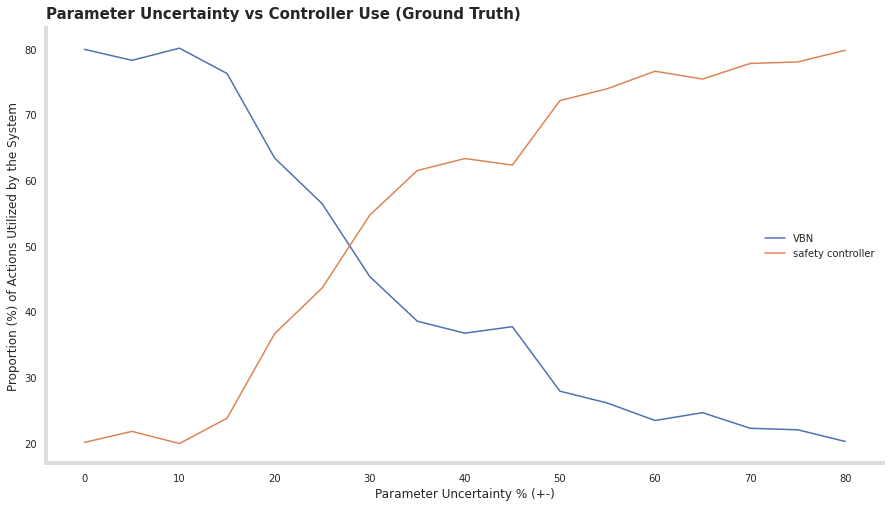

In [74]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_gt[median_gt['parameter_uncertainty']<85], x="parameter_uncertainty",y="time_taken_lec", label='VBN')
ax = sns.lineplot(data=median_gt[median_gt['parameter_uncertainty']<85], x="parameter_uncertainty",y="time_taken_safety_controller",label='safety controller')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='best',frameon=False)

_= plt.ylabel("Proportion (%) of Actions Utilized by the System")
_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Controller Use (Ground Truth)",loc='left',pad=10.0,fontweight="bold",fontsize=15)

plt.setp(ax.spines.values(), linewidth=4)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title


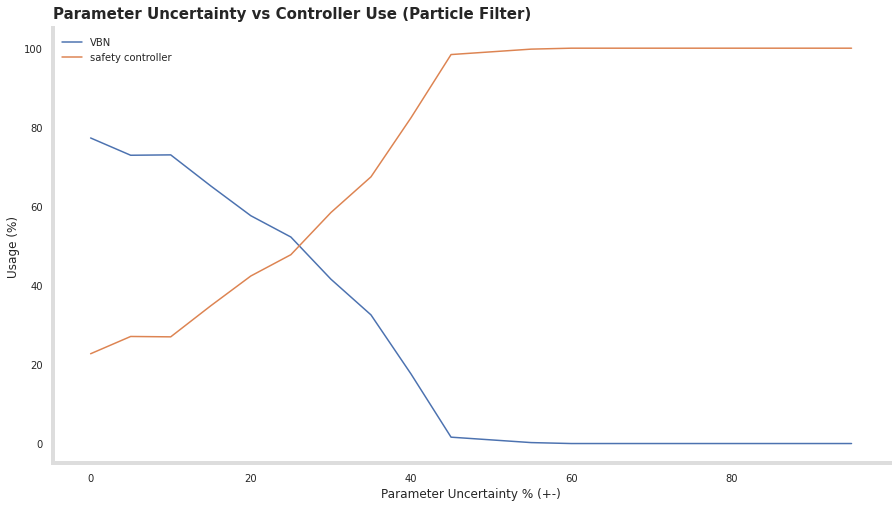

In [73]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y="time_taken_lec", label='VBN')
ax = sns.lineplot(data=median_pu, x="parameter_uncertainty",y="time_taken_safety_controller",label='safety controller')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
sns.despine(left=False, bottom=False, right=True)
_= plt.legend(loc='best',frameon=False)

_= plt.ylabel("Usage (%)")

_= plt.xlabel('Parameter Uncertainty % (+-)')
_= plt.title("Parameter Uncertainty vs Controller Use (Particle Filter)",loc='left',pad=10.0,fontweight="bold",fontsize=15)
plt.setp(ax.spines.values(), linewidth=4)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=15)  # fontsize of the figure title

### Experiments Varying Uncertainty and Reachability Horizon

In [13]:
params = ["0.000000","0.050000","0.100000","0.150000","0.200000","0.250000","0.300000","0.350000","0.400000","0.450000","0.500000",
"0.550000","0.600000","0.650000","0.700000","0.750000","0.800000","0.850000","0.900000","0.950000"]

reachtime = ["0.500000","0.600000","0.700000","0.800000","0.900000","1.000000","1.100000", "1.200000","1.300000",
"1.400000","1.500000","1.600000","1.700000","1.800000","1.800000","1.900000","2.000000"]

file_str = "ground_truth_{}_{}_.csv"
original_dfs = []
for uncp in params:
    for rt in reachtime: 
        filepath = file_str.format(uncp,rt)
        
        try:
            df = pd.read_csv(filepath,header=None)
            df = df.rename(columns={0:'time_str',1:'time_taken_lec',2:'time_taken_safety_controller',3:'area'})
            df['parameter_uncertainty']  = uncp
            df['reach_time']  = rt
            original_dfs.append(df)

        except Exception as e:
            continue
            #print(filepath,e)
            
reach_uncertainty = dfs = pd.concat(original_dfs)


In [14]:
ru_sorted = reach_uncertainty.sort_values(by=["parameter_uncertainty","reach_time"])
ru_sorted

,time_str,time_taken_lec,time_taken_safety_controller,area,parameter_uncertainty,reach_time
0,22/03/2022/14:45:24,0.987654,0.012346,3.29544,0.000000,0.500000
1,22/03/2022/14:46:15,0.923977,0.076023,3.07730,0.000000,0.500000
2,22/03/2022/14:47:34,0.985014,0.014986,3.06432,0.000000,0.500000
3,22/03/2022/14:48:20,0.912088,0.087912,3.12691,0.000000,0.500000
4,22/03/2022/14:49:07,0.859107,0.140893,3.08200,0.000000,0.500000
...,...,...,...,...,...,...
3,27/03/2022/09:34:38,0.071661,0.928339,10823.80000,0.900000,2.000000
4,27/03/2022/09:36:49,0.165595,0.834405,9872.37000,0.900000,2.000000
5,27/03/2022/09:39:00,0.070090,0.929910,10606.50000,0.900000,2.000000
6,27/03/2022/09:41:12,0.167072,0.832928,11330.80000,0.900000,2.000000


In [15]:
ru_sorted = reach_uncertainty.groupby(['parameter_uncertainty','reach_time']).median()
ru = reach_uncertainty.groupby(['parameter_uncertainty','reach_time']).median()
ru['percent_change_in_size_of_reachset'] = round((ru['area'] - ru_sorted.iloc[0]['area'])/ru_sorted.iloc[0]['area'] * 100,2)
ru

time_taken_lec  \
parameter_uncertainty reach_time                   
0.000000              0.500000          0.918033   
                      0.600000          0.867522   
                      0.700000          0.896238   
                      0.800000          0.869565   
                      0.900000          0.751115   
...                                          ...   
0.900000              1.600000          0.183142   
                      1.700000          0.168430   
                      1.800000          0.166467   
                      1.900000          0.150234   
                      2.000000          0.160699   

                                  time_taken_safety_controller          area  \
parameter_uncertainty reach_time                                               
0.000000              0.500000                        0.081968      3.063685   
                      0.600000                        0.132478      2.973180   
                      0.700000                        0.103762      2.944375   
                      0.800000                        0.130435      2.998950   
                      0.900000                        0.248886      2.959695   
...                                                        ...           ...   
0.900000              1.600000                        0.816858   4280.655000   
                      1.700000                        0.831569   5482.590000   
                      1.800000                        0.833533   7141.740000   
                      1.900000                        0.849767   8059.580000   
                      2.000000                        0.839301  10500.700000   

                                  percent_change_in_size_of_reachset  
parameter_uncertainty reach_time                                      
0.000000              0.500000                                  0.00  
                      0.600000                                 -2.95  
                      0.700000                                 -3.89  
                      0.800000                                 -2.11  
                      0.900000                                 -3.39  
...                                                              ...  
0.900000              1.600000                             139622.43  
                      1.700000                             178854.10  
                      1.800000                             233009.47  
                      1.900000                             262968.17  
                      2.000000                             342647.38  

[304 rows x 4 columns]

In [41]:
ru_plot = ru.reset_index()
ru_plot['reach_time'] = ru_plot["reach_time"].apply(float)
ru_plot['parameter_uncertainty'] = ru_plot['parameter_uncertainty'].apply(float) * 100
ru_plot['time_taken_lec'] = ru_plot['time_taken_lec'] * 100
ru_plot = round(ru_plot,2)
ru_plot.head()

,parameter_uncertainty,reach_time,time_taken_lec,time_taken_safety_controller,area,percent_change_in_size_of_reachset
0,0.0,0.5,91.80,0.08,3.06,0.00
1,0.0,0.6,86.75,0.13,2.97,-2.95
2,0.0,0.7,89.62,0.10,2.94,-3.89
3,0.0,0.8,86.96,0.13,3.00,-2.11
4,0.0,0.9,75.11,0.25,2.96,-3.39


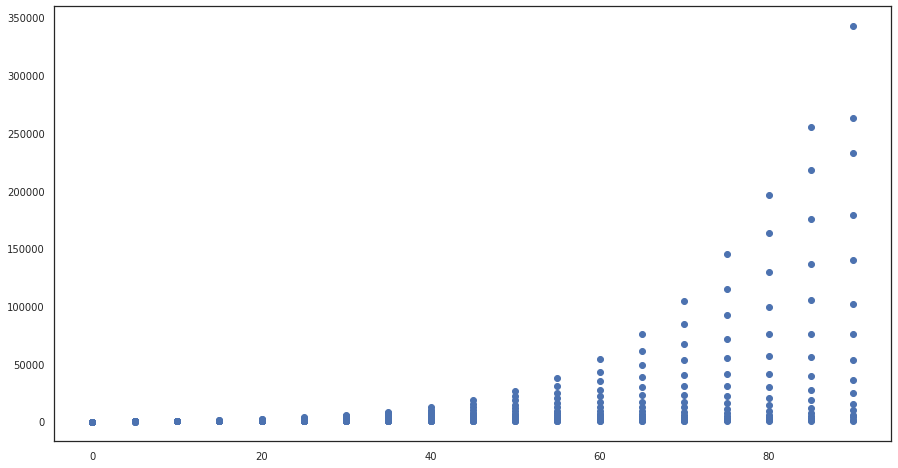

In [23]:
plt.figure(figsize=(15,8))

ax.spines['bottom'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

plt.scatter(ru_plot["parameter_uncertainty"], ru_plot["percent_change_in_size_of_reachset"])
#sns.despine(left=False, bottom=False, right=True)

# ax.set_xlabel("parameter_uncertainty")
# ax.set_ylabel("reach_time")
# ax.set_zlabel("percent_change_in_size_of_reachset")
# _= plt.legend(loc='best',frameon=False)

# _= plt.ylabel("Usage (%)")

# _= plt.xlabel('Parameter Uncertainty % (+-)')
# _= plt.title("Parameter Uncertainty vs Controller Use",loc='left',pad=10.0,fontweight="bold")

<Figure size 1080x576 with 0 Axes>

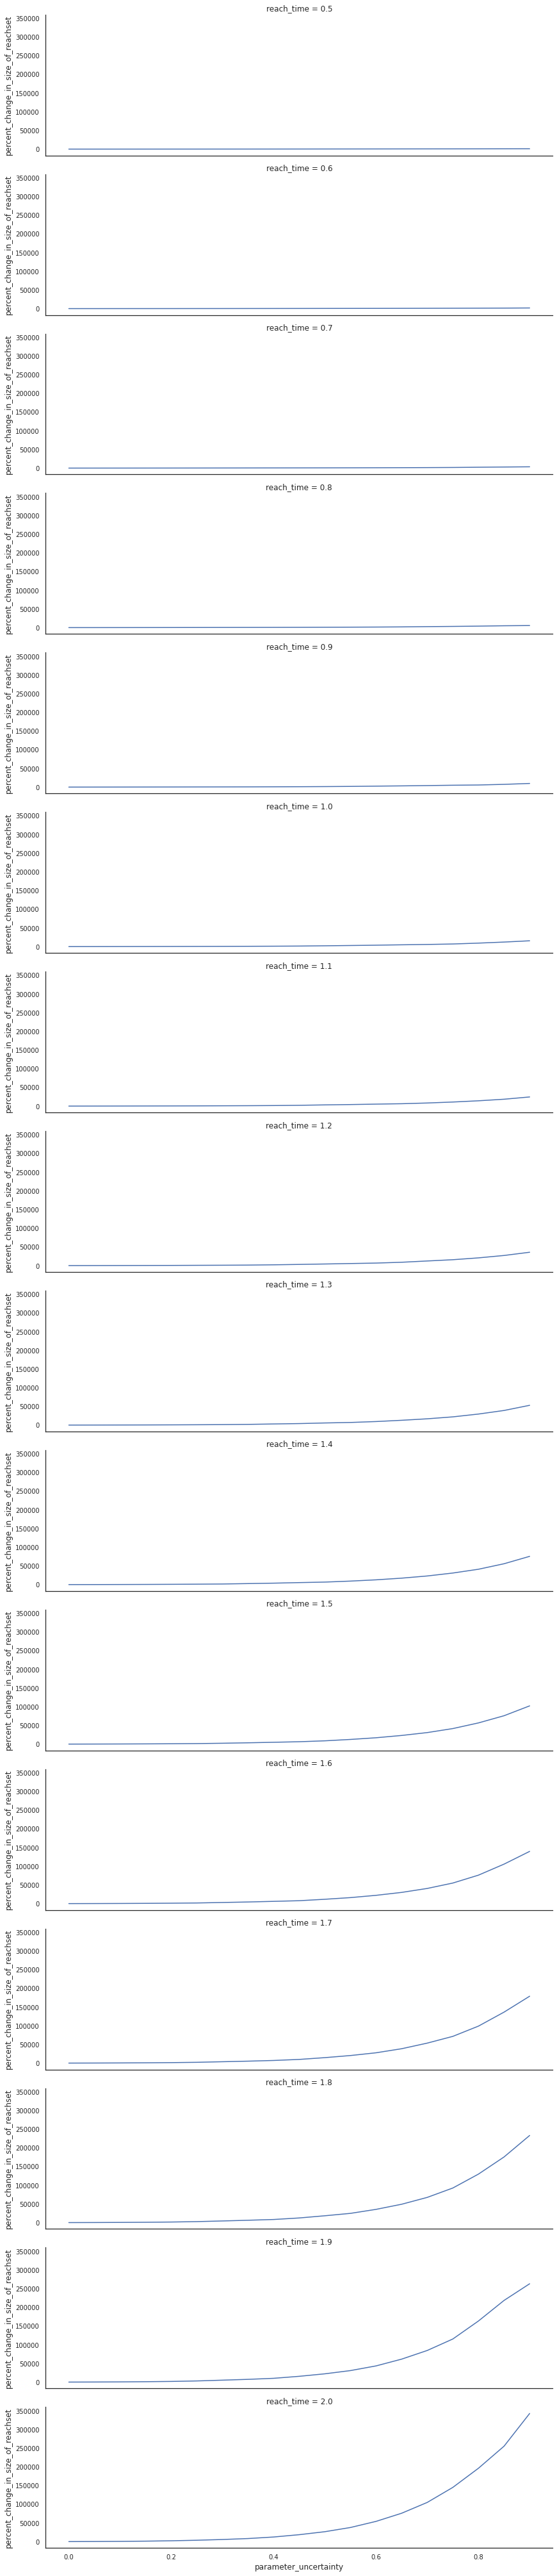

In [18]:
plt.figure(figsize=(15,8))
g = sns.FacetGrid(ru_plot, row="reach_time",height=3.5,aspect=3.5)
g.map(sns.lineplot, "parameter_uncertainty", "percent_change_in_size_of_reachset")

In [39]:
labs = {"percent_change_in_size_of_reachset":"% Change in Size of Reachset",
       "reach_time":"Reach Time (s)","parameter_uncertainty":"Parameter Uncertainty (%)"}

fig = px.scatter_3d(ru_plot, x="reach_time", y="parameter_uncertainty", 
                    z="percent_change_in_size_of_reachset",
                    color='percent_change_in_size_of_reachset',log_z=True,
                   labels=labs,width=1500, height=1000)
fig.show()

In [43]:
labs = {"percent_change_in_size_of_reachset":"% Change in Size of Reachset",
       "reach_time":"Reach Time (s)","parameter_uncertainty":"Parameter Uncertainty (%)","time_taken_lec":"ML Controller Use (%)"}

fig = px.scatter_3d(ru_plot, x="reach_time", y="parameter_uncertainty", 
                    z="time_taken_lec",
                    color="time_taken_lec",
                   labels=labs,width=1500, height=1000)
fig.show()

,parameter_uncertainty,reach_time,time_taken_lec,time_taken_safety_controller,area,percent_change_in_size_of_reachset
0,0.0,0.5,0.92,0.08,3.06,0.00
1,0.0,0.6,0.87,0.13,2.97,-2.95
2,0.0,0.7,0.90,0.10,2.94,-3.89
3,0.0,0.8,0.87,0.13,3.00,-2.11
4,0.0,0.9,0.75,0.25,2.96,-3.39
...,...,...,...,...,...,...
299,0.9,1.6,0.18,0.82,4280.66,139622.43
300,0.9,1.7,0.17,0.83,5482.59,178854.10
301,0.9,1.8,0.17,0.83,7141.74,233009.47
302,0.9,1.9,0.15,0.85,8059.58,262968.17
